In [ ]:
UNEMPLOYMENT ANALYSIS WITH PYTHON

## Introduction
Unemployment is a critical economic indicator that affects individuals and economies. This project aims to analyze the unemployment rate in India using two datasets: one containing unemployment data up to November 2020 and another containing general unemployment statistics. The goal is to visualize and understand the trends, distributions, and regional differences in unemployment across India.

## Importing Libraries
We start by importing the necessary libraries for data manipulation, visualization, and analysis.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Ensure plots are displayed inline in Jupyter notebooks
%matplotlib inline


## Loading and Inspecting Data
Next, we load the datasets and display the first few rows to understand their structure.

In [26]:
# Load the datasets
df1 = pd.read_csv(r"C:\Users\mpara\Intern Projects\Unemployment in India.csv")
df2 = pd.read_csv(r"C:\Users\mpara\Intern Projects\Unemployment_Rate_upto_11_2020.csv")




In [27]:
# Display the first few rows of each dataset
print("First Dataset:\n", df1.head())
print("Second Dataset:\n", df2.head())

First Dataset:
            Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  
Second Dataset:
            Region         Date  Frequency   Esti

## Data Preprocessing
We rename columns for better readability, strip any leading/trailing spaces from the 'Date' column, and convert the 'Date' column to a datetime format. Missing values are handled by dropping any rows that contain them.

In [28]:
# Check for missing values
print("Missing values in second dataset:\n", df2.isnull().sum())

# Rename columns for better readability
df2.columns = ["State", "Date", "Frequency", 
               "Unemployment Rate", "Employed", 
               "Labour Participation Rate", "Region", 
               "Longitude", "Latitude"]

# Strip any leading/trailing spaces from the 'Date' column
df2['Date'] = df2['Date'].str.strip()

# Convert 'Date' to datetime format
df2['Date'] = pd.to_datetime(df2['Date'], format='%d-%m-%Y', dayfirst=True, errors='coerce')

# Drop rows with missing values if any
df2.dropna(inplace=True)


Missing values in second dataset:
 Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64


## Exploratory Data Analysis (EDA)
We generate summary statistics and visualize the correlation matrix to understand the relationships between numeric variables.

                                Date  Unemployment Rate      Employed  \
count                            267         267.000000  2.670000e+02   
mean   2020-06-16 09:15:30.337078528          12.236929  1.396211e+07   
min              2020-01-31 00:00:00           0.500000  1.175420e+05   
25%              2020-03-31 00:00:00           4.845000  2.838930e+06   
50%              2020-06-30 00:00:00           9.650000  9.732417e+06   
75%              2020-08-31 00:00:00          16.755000  2.187869e+07   
max              2020-10-31 00:00:00          75.850000  5.943376e+07   
std                              NaN          10.803283  1.336632e+07   

       Labour Participation Rate   Longitude    Latitude  
count                 267.000000  267.000000  267.000000  
mean                   41.681573   22.826048   80.532425  
min                    16.770000   10.850500   71.192400  
25%                    37.265000   18.112400   76.085600  
50%                    40.390000   23.610200   

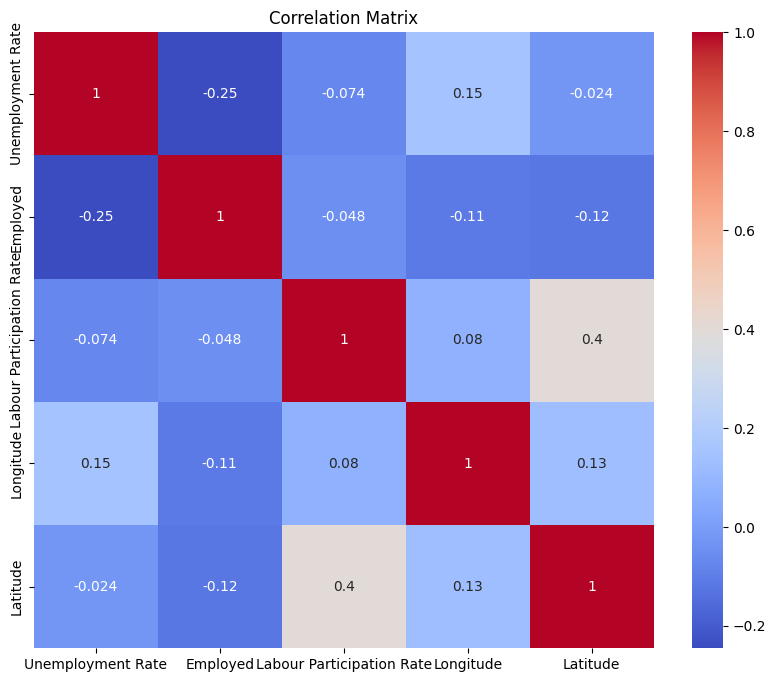

In [29]:
# Summary statistics for numeric columns
print(df2.describe())

# Correlation matrix for numeric columns
numeric_cols = df2.select_dtypes(include=[np.number]).columns
corr_matrix = df2[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## Visualization

 1. Unemployment Rate Over Time by Region

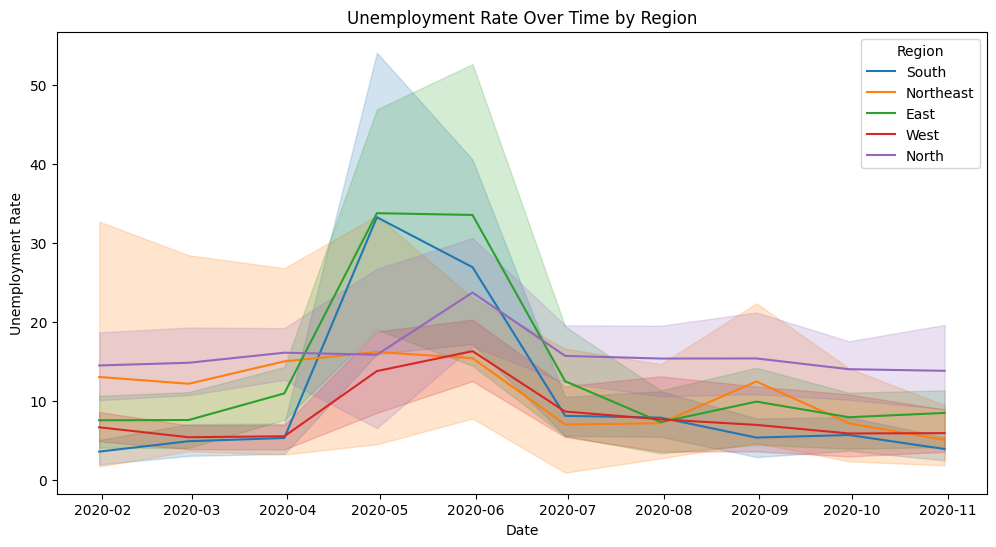

In [30]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Unemployment Rate', hue='Region', data=df2)
plt.title('Unemployment Rate Over Time by Region')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.legend(title='Region')
plt.show()


2. Distribution of Employed by Region

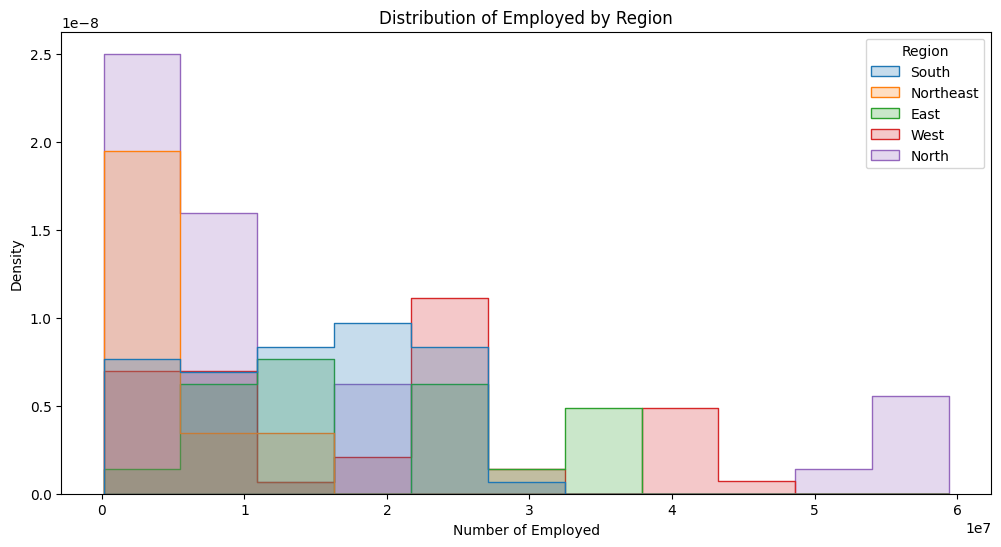

In [31]:
# Distribution of Employed by Region
plt.figure(figsize=(12, 6))
sns.histplot(df2, x='Employed', hue='Region', element='step', stat='density')
plt.title('Distribution of Employed by Region')
plt.xlabel('Number of Employed')
plt.ylabel('Density')
plt.show()

3. Distribution of Unemployment Rate by Region

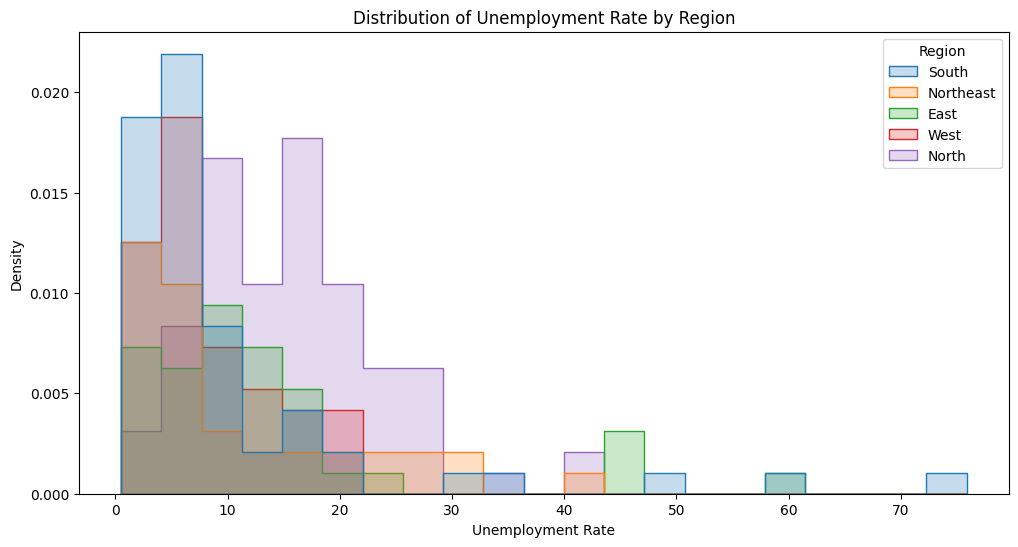

In [32]:
plt.figure(figsize=(12, 6))
sns.histplot(df2, x='Unemployment Rate', hue='Region', element='step', stat='density')
plt.title('Distribution of Unemployment Rate by Region')
plt.xlabel('Unemployment Rate')
plt.ylabel('Density')
plt.show()


4. Sunburst Chart of Unemployment Rate by Region and State

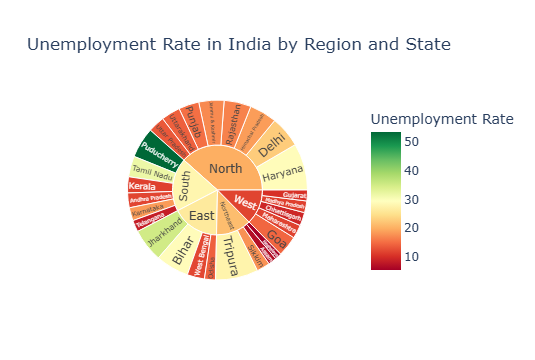

In [33]:
unemployment_data = df2[['State', 'Region', 'Unemployment Rate']]
fig = px.sunburst(unemployment_data, path=['Region', 'State'], values='Unemployment Rate',
                  color='Unemployment Rate', color_continuous_scale='RdYlGn',
                  title='Unemployment Rate in India by Region and State')
fig.show()


## Conclusion

In [18]:
# Summary of findings
print("Summary of Analysis:")
print("1. The correlation matrix reveals relationships between different numerical features.")
print("2. Line plots show the trends of unemployment rates over time, highlighting regional differences.")
print("3. Histograms reveal the distribution of employment and unemployment rates across regions.")
print("4. The sunburst chart provides a hierarchical view of unemployment rates by region and state.")


Summary of Analysis:
1. The correlation matrix reveals relationships between different numerical features.
2. Line plots show the trends of unemployment rates over time, highlighting regional differences.
3. Histograms reveal the distribution of employment and unemployment rates across regions.
4. The sunburst chart provides a hierarchical view of unemployment rates by region and state.
